In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


(2621, 6)

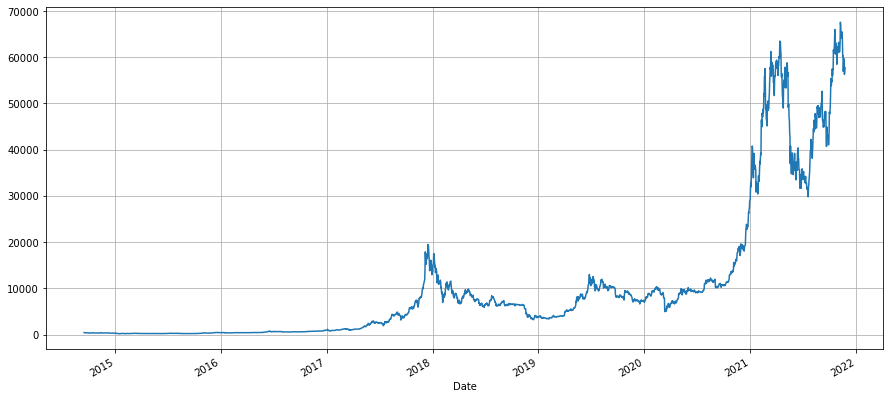

In [24]:
# Loading the dataset
df_btc = yf.download(tickers='BTC-USD', period = '10y', interval = '1d')
df_btc.drop(df_btc[df_btc['Volume']==0].index, inplace = True)
df_btc['Close'].plot(grid=True,figsize=(15,7))
df_btc.shape

In [25]:
#Mostrando filtrando por ano
df2020 = df_btc['2020']
df2020
df2021 = df_btc['2021']
df2021.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,38702407772
2021-11-20,58115.082031,59859.878906,57469.726562,59697.195312,59697.195312,30624264863
2021-11-21,59730.507812,60004.425781,58618.929688,58730.476562,58730.476562,26123447605
2021-11-22,58706.847656,59266.359375,55679.839844,56289.289062,56289.289062,35036121783
2021-11-24,57689.535156,57803.066406,57548.332031,57756.125000,57756.125000,37153939456


In [26]:
#Juntado diferentes séries temporais
df_20_21 = df2020.join(df2021.set_index(df2021.index), how='left', lsuffix='_left', rsuffix='_right')
df_20_21.head(5)

,Open_left,High_left,Low_left,Close_left,Adj Close_left,Volume_left,Open_right,High_right,Low_right,Close_right,Adj Close_right,Volume_right
Date,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,NaN,NaN,NaN,NaN


## Correlacão

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100
...,...,...,...,...,...,...
2021-11-19,3995.729492,4311.713867,3982.917480,4298.306641,4298.306641,20626269711
2021-11-20,4298.350586,4434.388184,4209.242676,4409.931152,4409.931152,15448261277
2021-11-21,4412.195312,4422.491699,4255.455078,4269.732910,4269.732910,14094831413


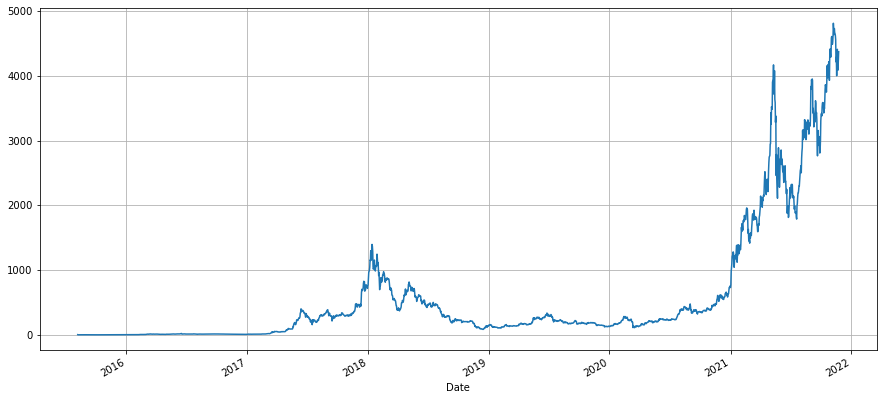

In [28]:
#Importando Ethereum USD
df_eth = yf.download(tickers='ETH-USD', period = '10y', interval = '1d')
df_eth.drop(df_eth[df_eth['Volume']==0].index, inplace = True)
df_eth['Close'].plot(grid=True,figsize=(15,7))
df_eth

In [29]:
# Compute percent change using pct_change()
close_eth = df_eth['Close'].pct_change()
close_btc = df_btc['Close'].pct_change()
correlation = close_eth.corr(close_btc)
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.5194048039035705


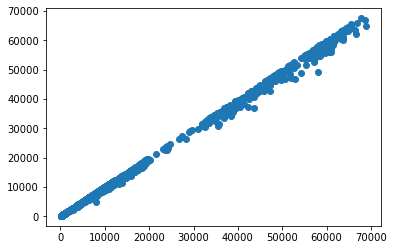

In [30]:
plt.scatter(df_btc['High'], df_btc['Close'])
plt.show()

In [31]:
#Regressão

In [32]:
# Import the statsmodels module
import statsmodels.api as sm

correlation = df_btc['High'].corr(df_btc['Close'])
print("Correlation of stocks and interest rates: ", correlation)

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(df_btc, columns=['Close'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(df_btc)

# Regress y on dfx1
result = sm.OLS(df_btc['High'], dfx1[['const', 'Close']]).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

Correlation of stocks and interest rates:  0.9994881376434773
                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.556e+06
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:43:24   Log-Likelihood:                -19982.
No. Observations:                2621   AIC:                         3.997e+04
Df Residuals:                    2619   BIC:                         3.998e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

## Autocorrelação

[1.         0.99438276 0.98973543 0.98458076 0.97912621 0.97357418
 0.96890148 0.96316994 0.95769073 0.95176685 0.9458018  0.93960335
 0.93353506 0.92758938 0.9215459  0.91539651 0.90918826 0.90371542
 0.89813572 0.89288748 0.88753392 0.88201264 0.87651375 0.87153708
 0.86650253 0.86150148 0.85641177 0.85143065 0.84700368 0.84198577
 0.83692514 0.8318518  0.82646077 0.82165205 0.81641497 0.81094353
 0.80588251 0.80110979 0.79608879 0.79133267 0.78669259]


C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


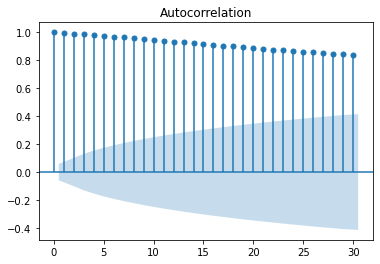

In [33]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(df_eth['Close'])
print(acf_array)

# Plot the acf function
plot_acf(df_eth['Close'], alpha=0.005, lags=30)
plt.show()

###  Noise

The mean is 0.002 and the standard deviation is 0.005


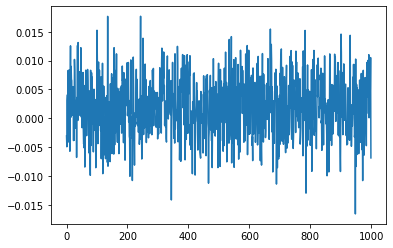

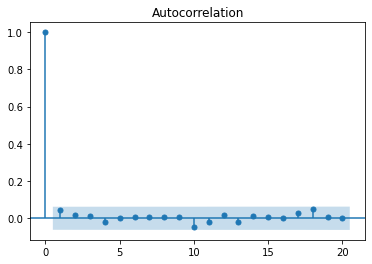

In [34]:

# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Simulate white noise returns
returns = np.random.normal(loc=0.002, scale=0.005, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()


### Drift (Random Walk)

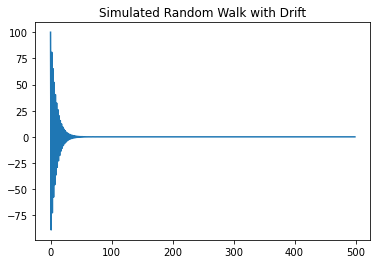

In [35]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + np.random.normal()

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### ADF test

In [36]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(df_eth['Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))
# SE FOR MENOR QUE 0.05 QUER DIZER QUE POSSUI PERIODICIADE

(1.9423457697733562, 0.9985931837153348, 17, 2279, {'1%': -3.4332226111473805, '5%': -2.86280905025955, '10%': -2.567445573742053}, 24840.674314499738)
The p-value of the test on prices is: 0.9985931837153348


### Auto Regression

In [37]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(df_eth['Close'], order=(1,0))
res = mod.fit()
#Selecionar o período de forecasting
# res.plot_predict(start='2021-11-09 01:00:00+00:00', end='2021-11-09 :00:00+00:00')
# plt.show()



C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

### AR MA

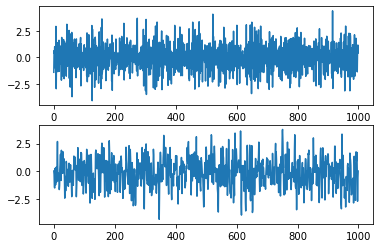

In [38]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

In [39]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(df_eth['Close'], order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2297
Model:                     ARMA(0, 1)   Log Likelihood              -17517.865
Method:                       css-mle   S.D. of innovations            496.192
Date:                Tue, 23 Nov 2021   AIC                          35041.730
Time:                        21:43:25   BIC                          35058.948
Sample:                             0   HQIC                         35048.008
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         566.0818     20.192     28.035      0.000     526.507     605.657
ma.L1.Close     0.9507      0.005    205.097      0.000       0.942       0.960
                                    Roots       

C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

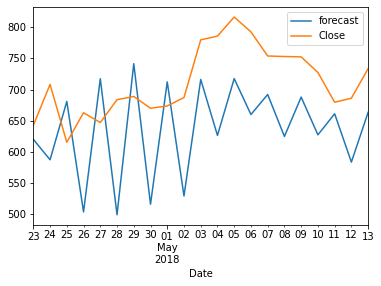

In [40]:
mod = ARMA(df_eth['Close'], order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

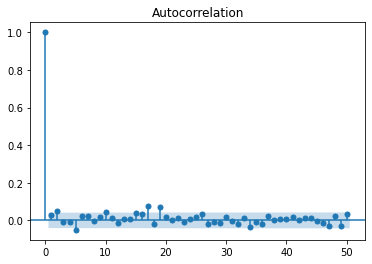

const          0.005338
ma.L1.Close    0.027327
dtype: float64


C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = df_eth['Close'].pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=50)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

## Aplicação completa

The p-value for the ADF test is  0.9595933764294627


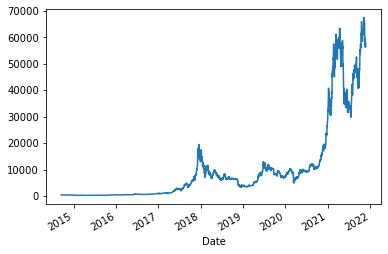

In [49]:
from statsmodels.tsa.stattools import adfuller

df_btc['Close'].plot()

result = adfuller(df_btc['Close'])
print("The p-value for the ADF test is ", result[1])
print('Como p-value é maior que 0.05 então não é estacionario')

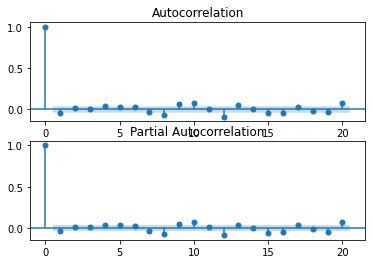

In [51]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = df_btc['Close'].diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()
print('Não possui autocorrelação e nem parcial')

In [62]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(8) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(8, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1, 1, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)
print('Quanto menor o AIC melhor o desemenho do forecasting')

C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

The AIC for an AR(1) is:  42040.43285340512
The AIC for an AR(2) is:  42025.80007919643


C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


The AIC for an ARMA(1,1) is:  42041.955764571045
Quanto menor o AIC melhor o desemenho do forecasting


C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\luis.ribeiro\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associ

<Figure size 1080x504 with 0 Axes>

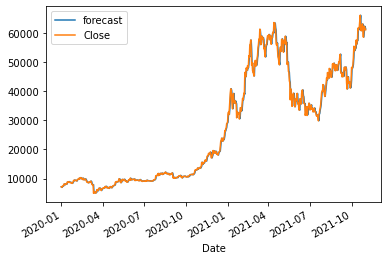

In [68]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(15,7))
# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(df_btc['Close'], order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series

res.plot_predict(start='2020-01-01', end='2021-11-01')

plt.show()

## 3 validations methods:

### Sliding Window Validation

In [ ]:
for date in pd.date_range('2021-02-01', '2021-12-31', freq='MS'):
    delta = date - pd.offsets.MonthBegin(1)
    train = series.loc[delta:date-pd.offsets.Day(1)]
    valid = series.loc[date:date+pd.offsets.MonthEnd(1)]

### Expanding Window Validation

In [ ]:
for date in pd.date_range('2021-02-01', '2021-12-31', freq='MS'):
    train = series.loc[:date-pd.offsets.Day(1)]
    valid = series.loc[date:date+pd.offsets.MonthEnd(1)]

### Inserting a Gap Between Training and Validation

In [ ]:
for date in pd.date_range('2021-02-01', '2021-12-31', freq='MS'):
    delta = date - pd.offsets.MonthBegin(1)
    train = series.loc[delta:date-pd.offsets.Day(1)]
    valid = series.loc[date+pd.offsets.MonthEnd(1)+pd.offsets.Day(1):date+pd.offsets.MonthEnd(2)]